In [19]:
import pandas as pd
import pymongo
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

#### 读入CSV文件

In [3]:
yeb = pd.read_csv('yeb.csv')

In [9]:
yeb= yeb.iloc[:,[2,3]]

#### 转换为浮点数

In [25]:
yeb['收益率']= yeb['收益率'].astype(float)

c:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


转换日期

In [15]:
yeb['time'] = pd.to_datetime(yeb.time,format="%Y-%m-%d")

c:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


设置黑体

In [18]:
matplotlib.rcParams['font.family']='SimHei'

In [20]:
years = mdates.YearLocator(month=5, day=30)   # 在每年5月30日 打一个主刻度
months = mdates.MonthLocator()  # 每月是副刻度
years_fmt = mdates.DateFormatter('%Y-%m-%d') #在主刻度上显示的文字

In [22]:
datemax = yeb.loc[0,'time']
datemin = yeb.loc[2220,'time']

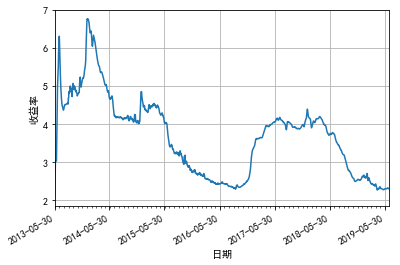

In [24]:
fig, ax = plt.subplots()
ax.plot(yeb['time'],yeb['收益率'])#设置x轴和Y轴
plt.xlabel('日期')
plt.ylabel('收益率')
ax.xaxis.set_major_locator(years) #设置刻度
ax.xaxis.set_major_formatter(years_fmt) #设置刻度标签
ax.xaxis.set_minor_locator(months)#设置副刻度
ax.set_xlim(datemin, datemax)# 设置X轴的限制 也就是起始位置
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
# ax.format_ydata = lambda x: '$%1.2f' % x
fig.autofmt_xdate()# 设置成斜的
ax.grid()         # 设置开启风格